In [ ]:

#https://www.kaggle.com/c/cassava-leaf-disease-classification/data
#5acab72028e81c5fbbddde9eb6202108

!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/gauravduttakiit/cassava-leaf-disease-classification", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: flourisholaiya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/cassava-leaf-disease-classification


100%|██████████| 2.39G/2.39G [00:18<00:00, 138MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,  # Increased zoom
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],  # Vary brightness
    fill_mode="nearest",
    validation_split=0.3
)


# Data augmentation
#train_datagen = ImageDataGenerator(
   # rescale=1./255,
   # rotation_range=30,
   # width_shift_range=0.2,
    #height_shift_range=0.2,
   # shear_range=0.2,
   # zoom_range=0.2,
    #horizontal_flip=True,
    #validation_split=0.2
#)

# Load training data
train_data = train_datagen.flow_from_directory(
    '/content/cassava-leaf-disease-classification/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_data = train_datagen.flow_from_directory(
    '//content/cassava-leaf-disease-classification/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 11984 images belonging to 5 classes.
Found 1282 images belonging to 5 classes.


In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
#base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
#base_model = tf.keras.applications.ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
#base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
#base_model.trainable = False  # Freeze base model layers

from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 as the feature extractor
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
#base_model.trainable = False

# Unfreeze the last few layers
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Keep first 20 layers frozen
    layer.trainable = False

# Add custom classification layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Regularization
output = tf.keras.layers.Dense(5, activation="softmax")(x)  # 5 classes

# Build and compile the model
model = tf.keras.Model(inputs=base_model.input, outputs=output)
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
           #   loss="categorical_crossentropy",
           #   metrics=["accuracy"])




# Add classification layers
#model = tf.keras.Sequential([
   # base_model,
   # tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(5, activation='softmax')  # Adjust output neurons to match the number of classes
#])


# Recompile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])



# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.mixed_precision import set_global_policy

set_global_policy("mixed_float16")

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=12,  # Train longer but with an adaptive LR
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data),
    callbacks=[lr_scheduler]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 258s 638ms/step - accuracy: 0.6332 - loss: 1.0257 - val_accuracy: 0.6209 - val_loss: 3.0882 - learning_rate: 1.0000e-04
Epoch 2/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 225s 601ms/step - accuracy: 0.7293 - loss: 0.7677 - val_accuracy: 0.6537 - val_loss: 2.6272 - learning_rate: 1.0000e-04
Epoch 3/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 261s 598ms/step - accuracy: 0.7376 - loss: 0.7191 - val_accuracy: 0.6732 - val_loss: 1.7656 - learning_rate: 1.0000e-04
Epoch 4/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 259s 589ms/step - accuracy: 0.7545 - loss: 0.6824 - val_accuracy: 0.6552 - val_loss: 2.7306 - learning_rate: 1.0000e-04
Epoch 5/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 222s 593ms/step - accuracy: 0.7630 - loss: 0.6438 - val_accuracy: 0.6989 - val_loss: 1.6056 - learning_rate: 1.0000e-04
Epoch 6/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 261s 590ms/step - accuracy: 0.7699 - loss: 0.6331 - val_accuracy: 0.7231 - val_loss: 1.0256 - learning_rate: 1.0000e-04
Epoch 7/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 

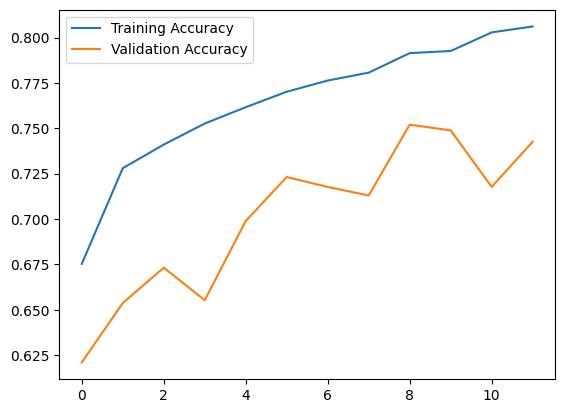

In [ ]:
### **Step 6: Evaluate the Model**
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

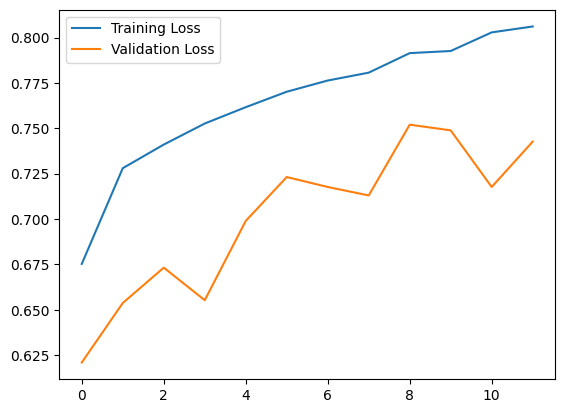

In [ ]:
### **Step 6: Evaluate the Model**
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.save('cassava_leaf_disease_model.keras')

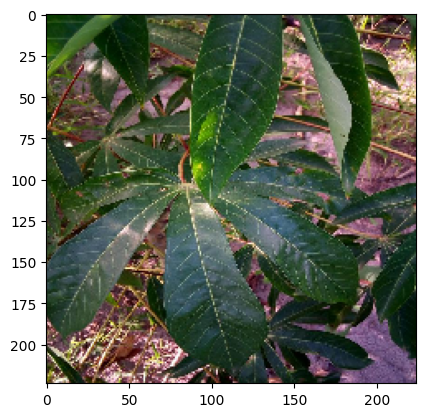

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Cassava Bacterial Blight (CBB): 0.0081
Cassava Brown Streak Disease (CBSD): 0.0217
Cassava Green Mottle (CGM): 0.0227
Cassava Mosaic Disease (CMD): 0.1224
Healthy: 0.8251
Prediction: Healthy (with probability 0.8251)


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "//content/cassava-leaf-disease-classification/test/Healthy/1035014017.jpg"
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = img_array / 255
plt.imshow(img_array[0])
plt.show()

prediction = model.predict(img_array)

predicted_class_index = tf.math.argmax(prediction[0]).numpy()
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

for i, probability in enumerate(prediction[0]):
    print(f"{class_labels[i]}: {probability:.4f}")


print(f"Prediction: {predicted_class} (with probability {prediction[0][predicted_class_index]:.4f})")

In [ ]:
!pip install huggingface-hub

In [ ]:
from huggingface_hub import login

# Log in to your Hugging Face account
login()

# Save the model
model.save_pretrained('cassava-CNN-model')

# Push to Hub
model.push_to_hub('cassava-CNN-classifier')

AttributeError: 'Functional' object has no attribute 'save_pretrained'